# Uitdaging: Tekst analyseren over Data Science

> *In deze notebook experimenteren we met het gebruik van verschillende URL's - Wikipedia-artikel over Machine Learning. Je zult zien dat, in tegenstelling tot Data Science, dit artikel veel termen bevat, wat de analyse problematischer maakt. We moeten een andere manier bedenken om de data op te schonen na het uitvoeren van keyword-extractie, om van enkele veelvoorkomende, maar nietszeggende woordcombinaties af te komen.*

In dit voorbeeld doen we een eenvoudige oefening die alle stappen van een traditioneel data science-proces omvat. Je hoeft geen code te schrijven, je kunt gewoon op de cellen hieronder klikken om ze uit te voeren en het resultaat te bekijken. Als uitdaging word je aangemoedigd om deze code met andere data uit te proberen.

## Doel

In deze les hebben we verschillende concepten besproken die te maken hebben met Data Science. Laten we proberen meer gerelateerde concepten te ontdekken door middel van **tekstmining**. We beginnen met een tekst over Data Science, halen daaruit sleutelwoorden, en proberen vervolgens het resultaat te visualiseren.

Als tekst gebruik ik de pagina over Data Science van Wikipedia:


In [2]:
url = 'https://en.wikipedia.org/wiki/Data_science'
url = 'https://en.wikipedia.org/wiki/Machine_learning'

## Stap 1: De gegevens ophalen

De eerste stap in elk datawetenschapsproces is het ophalen van de gegevens. We gebruiken de bibliotheek `requests` om dit te doen:


In [3]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Machine learning - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"77162785-16e9-4d7f-a175-7f3fcf502a66","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Machine_learning","wgTitle":"Machine learning","wgCurRevisionId":1041247229,"wgRevisionId":1041247229,"wgArticleId":233488,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: missing periodical","Harv and Sfn no-target errors","CS1 maint: uses authors parameter","Articles with short description","Short description is dif

## Stap 2: De gegevens transformeren

De volgende stap is om de gegevens om te zetten in een vorm die geschikt is voor verwerking. In ons geval hebben we de HTML-broncode van de pagina gedownload, en we moeten deze omzetten naar platte tekst.

Er zijn veel manieren om dit te doen. We zullen gebruik maken van het eenvoudigste ingebouwde [HTMLParser](https://docs.python.org/3/library/html.parser.html)-object van Python. We moeten de `HTMLParser`-klasse uitbreiden en de code definiëren die alle tekst binnen HTML-tags verzamelt, behalve de `<script>`- en `<style>`-tags.


In [4]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Machine learning - Wikipedia Machine learning From Wikipedia, the free encyclopedia Jump to navigation Jump to search Study of algorithms that improve automatically through experience For the journal, see  Machine Learning (journal) . "Statistical learning" redirects here. For statistical learning in linguistics, see  statistical learning in language acquisition . Part of a series on Artificial intelligence Major goals Artificial general intelligence Planning Computer vision General game playing Knowledge reasoning Machine learning Natural language processing Robotics Approaches Symbolic Deep learning Bayesian networks Evolutionary algorithms Philosophy Ethics Existential risk Turing test Chinese room Control problem Friendly AI History Timeline Progress AI winter Technology Applications Projects Programming languages Glossary Glossary v t e Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection Data Cleaning AutoML Associ

## Stap 3: Inzichten verkrijgen

De belangrijkste stap is om onze gegevens om te zetten in een vorm waaruit we inzichten kunnen halen. In ons geval willen we trefwoorden uit de tekst halen en bekijken welke trefwoorden het meest betekenisvol zijn.

We gebruiken een Python-bibliotheek genaamd [RAKE](https://github.com/aneesha/RAKE) voor het extraheren van trefwoorden. Laten we eerst deze bibliotheek installeren, voor het geval deze nog niet aanwezig is:


In [5]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


De belangrijkste functionaliteit is beschikbaar via het `Rake`-object, dat we kunnen aanpassen met enkele parameters. In ons geval stellen we de minimale lengte van een trefwoord in op 5 tekens, de minimale frequentie van een trefwoord in het document op 3, en het maximale aantal woorden in een trefwoord op 2. Voel je vrij om met andere waarden te experimenteren en het resultaat te observeren.


In [6]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('data mining', 4.0),
 ('polynomial time', 4.0),
 ('dimensionality reduction', 4.0),
 ('anomaly detection', 4.0),
 ('data set', 4.0),
 ('bayesian networks', 4.0),
 ('language corpora', 4.0),
 ('mcgraw hill', 4.0),
 ('mit press', 4.0),
 ('retrieved 2018-08-20', 4.0),
 ('artificial neuron', 3.9642857142857144),
 ('statistical learning', 3.9470198675496686),
 ('feature learning', 3.9470198675496686),
 ('reinforcement learning', 3.9470198675496686),
 ('deep learning', 3.9470198675496686),
 ('main article', 3.9411764705882355),
 ('machine learning', 3.9144111718974948),
 ('pattern recognition', 3.9),
 ('neural networks', 3.875),
 ('artificial intelligence', 3.864285714285714),
 ('supervised learning', 3.835908756438558),
 ('speech recognition', 3.833333333333333),
 ('bayesian network', 3.833333333333333),
 ('explicitly programmed', 3.8),
 ('biological brain', 3.8),
 ('unsupervised learning', 3.780353200883002),
 ('outlier detection', 3.75),
 ('ieee transactions', 3.75),
 ('isbn 978-0-262-0

We hebben een lijst met termen verkregen, samen met de bijbehorende mate van belangrijkheid. Zoals je kunt zien, staan de meest relevante disciplines, zoals machine learning en big data, bovenaan de lijst.

## Stap 4: Het resultaat visualiseren

Mensen kunnen gegevens het beste interpreteren in visuele vorm. Daarom is het vaak zinvol om de gegevens te visualiseren om inzichten te verkrijgen. We kunnen de `matplotlib`-bibliotheek in Python gebruiken om een eenvoudige verdeling van de trefwoorden met hun relevantie te plotten:


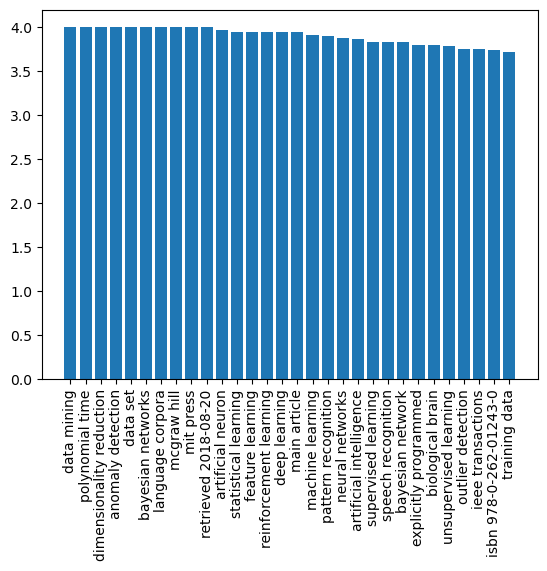

In [9]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res[:30])

Er is echter een nog betere manier om woordfrequenties te visualiseren - met behulp van **Word Cloud**. We zullen een andere bibliotheek moeten installeren om de word cloud van onze trefwoordenlijst te plotten.


In [71]:
!{sys.executable} -m pip install wordcloud

`WordCloud`-object is verantwoordelijk voor het verwerken van originele tekst, of een vooraf berekende lijst van woorden met hun frequenties, en retourneert een afbeelding, die vervolgens kan worden weergegeven met behulp van `matplotlib`:


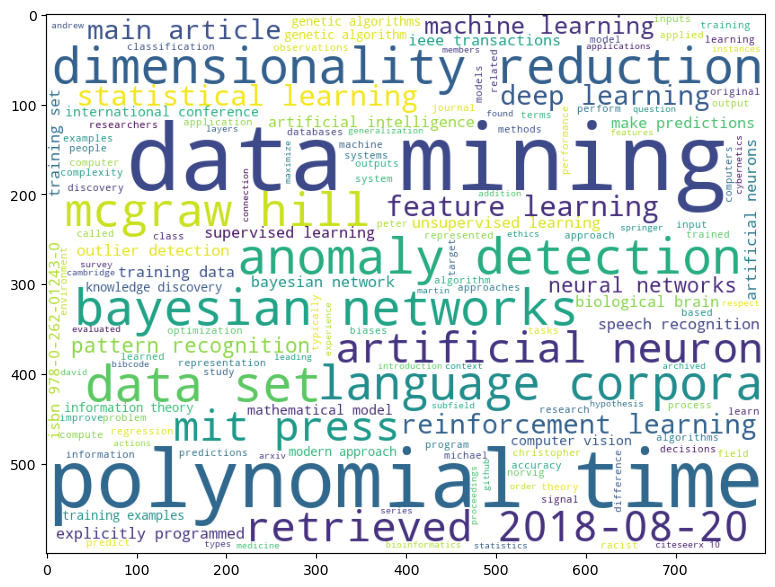

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))
plt.show()

We kunnen ook de originele tekst doorgeven aan `WordCloud` - laten we kijken of we een vergelijkbaar resultaat kunnen krijgen:


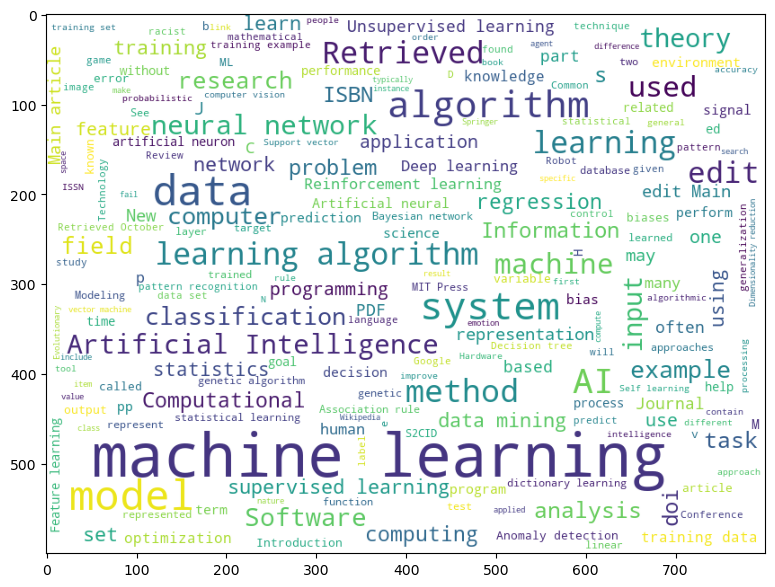

In [13]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))
plt.show()

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

Je kunt zien dat de woordwolk er nu indrukwekkender uitziet, maar het bevat ook veel ruis (bijvoorbeeld niet-gerelateerde woorden zoals `Retrieved on`). Daarnaast krijgen we minder trefwoorden die uit twee woorden bestaan, zoals *data scientist* of *computer science*. Dit komt doordat het RAKE-algoritme veel beter is in het selecteren van goede trefwoorden uit tekst. Dit voorbeeld laat zien hoe belangrijk het is om data vooraf te verwerken en op te schonen, omdat een helder beeld aan het einde ons in staat stelt betere beslissingen te nemen.

In deze oefening hebben we een eenvoudig proces doorlopen om enige betekenis uit Wikipedia-tekst te halen, in de vorm van trefwoorden en een woordwolk. Dit voorbeeld is vrij simpel, maar het laat goed alle typische stappen zien die een datawetenschapper doorloopt bij het werken met data, van het verkrijgen van data tot aan de visualisatie.

In onze cursus zullen we al deze stappen in detail bespreken.



---

**Disclaimer**:  
Dit document is vertaald met behulp van de AI-vertalingsservice [Co-op Translator](https://github.com/Azure/co-op-translator). Hoewel we streven naar nauwkeurigheid, dient u zich ervan bewust te zijn dat geautomatiseerde vertalingen fouten of onnauwkeurigheden kunnen bevatten. Het originele document in de oorspronkelijke taal moet worden beschouwd als de gezaghebbende bron. Voor kritieke informatie wordt professionele menselijke vertaling aanbevolen. Wij zijn niet aansprakelijk voor misverstanden of verkeerde interpretaties die voortvloeien uit het gebruik van deze vertaling.
